<a href="https://colab.research.google.com/github/AndrewRober/BruteForceBestTableFit/blob/master/Activation_functions_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

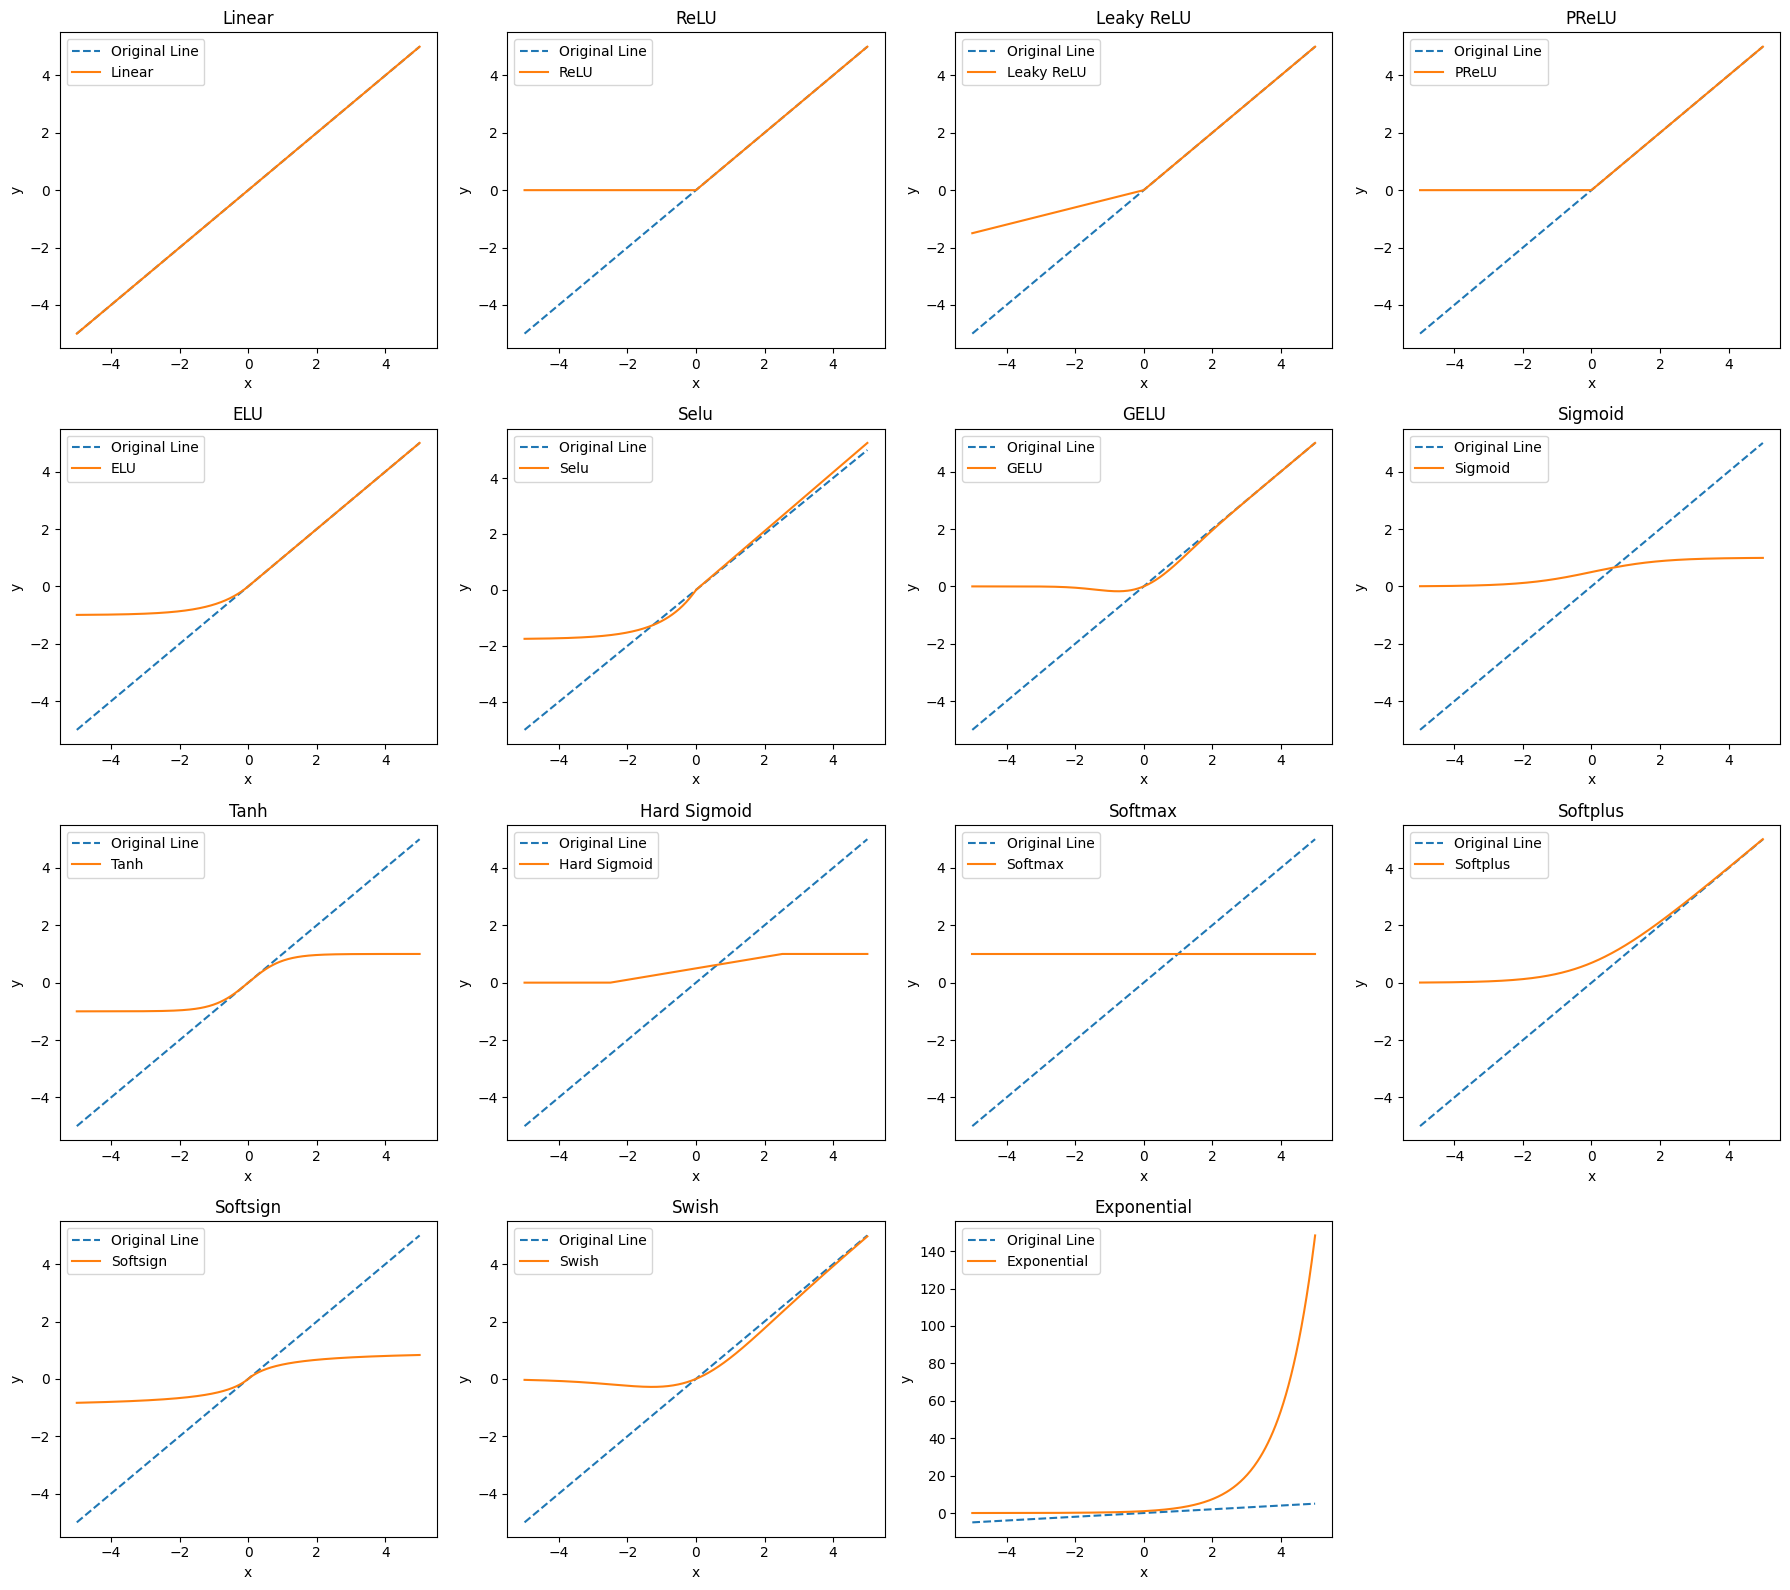

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

activation_functions = [
    ("Linear", tf.keras.activations.linear),
    ("ReLU", tf.keras.activations.relu),
    ("Leaky ReLU", tf.keras.layers.LeakyReLU(alpha=0.3)),
    ("PReLU", tf.keras.layers.PReLU()),
    ("ELU", tf.keras.activations.elu),
    ("Selu", tf.keras.activations.selu),
    ("GELU", tf.keras.activations.gelu),
    ("Sigmoid", tf.keras.activations.sigmoid),
    ("Tanh", tf.keras.activations.tanh),
    ("Hard Sigmoid", tf.keras.activations.hard_sigmoid),
    ("Softmax", tf.keras.activations.softmax),
    ("Softplus", tf.keras.activations.softplus),
    ("Softsign", tf.keras.activations.softsign),
    ("Swish", tf.keras.activations.swish),
    ("Exponential", tf.keras.activations.exponential),
]

def plot_activation_functions(activation_functions, x_range=(-5, 5)):
    x = np.linspace(x_range[0], x_range[1], 400)
    x_tensor = tf.convert_to_tensor(x)
    x_2d_tensor = tf.reshape(x_tensor, [-1, 1])  # Reshape to 2D tensor

    n_rows = np.ceil(len(activation_functions) / 4).astype(int)
    fig, axes = plt.subplots(n_rows, 4, figsize=(18, 4 * n_rows))
    axes = axes.ravel()

    for ax, (name, func) in zip(axes, activation_functions):
        try:
            if isinstance(func, tf.keras.layers.Layer):
                y = func.__call__(x_tensor)
            else:
                y = func(x_tensor)
            if isinstance(y, tf.Tensor):
                y = y.numpy()
        except ValueError:
            if isinstance(func, tf.keras.layers.Layer):
                y = func.__call__(x_2d_tensor)
            else:
                y = func(x_2d_tensor)
            if isinstance(y, tf.Tensor):
                y = y.numpy().flatten()

        ax.plot(x, x, linestyle="--", label="Original Line")
        ax.plot(x, y, label=name)
        ax.legend()

        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_title(name)

    # Remove empty subplots
    for i in range(len(activation_functions), n_rows * 4):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

plot_activation_functions(activation_functions)